<a href="https://colab.research.google.com/github/msatyajit7045/Bengaluru-Weather-Report/blob/main/Bengaluru_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
#Reading the csv file
path= "/content/Bengaluru Weather Data(3 Year).csv"
df = pd.read_csv(path)

## **Details of DataFrame**


In [ ]:
# lets see some top rows
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
0,2/18/2020,29.8,14.6,22.0,15.6,29.4,22.0,25.14,0.0,14.8,34.9,94.0
1,2/19/2020,30.0,15.4,22.5,16.7,30.4,23.0,24.39,0.0,15.5,29.2,97.0
2,2/20/2020,30.0,14.4,22.0,16.7,29.6,22.1,25.55,0.0,15.4,31.3,98.0
3,2/21/2020,30.1,15.7,22.3,17.4,30.2,22.8,25.47,0.0,15.6,28.8,105.0
4,2/22/2020,29.9,16.7,22.6,18.1,31.0,23.8,24.66,0.0,15.7,29.5,97.0


In [ ]:
# let see some bottom rows
df.tail(10)

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
1087,2/9/2023,29.5,15.7,22.5,17.5,29.4,22.8,23.79,0.0,14.2,33.5,85.0
1088,2/10/2023,29.3,15.0,22.3,16.4,28.8,21.8,24.17,0.0,15.3,35.3,80.0
1089,2/11/2023,29.8,14.2,22.2,15.2,28.3,21.2,24.56,0.0,12.8,30.6,79.0
1090,2/12/2023,30.3,14.9,22.6,15.4,29.5,21.9,24.60,0.0,15.7,35.3,84.0
1091,2/13/2023,18.4,16.0,NaN,14.7,18.4,NaN,NaN,NaN,9.8,16.6,NaN
1092,2/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,2/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094,2/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,2/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,2/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# print technical information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1097 non-null   object 
 1   temperature_2m_max (°C)          1092 non-null   float64
 2   temperature_2m_min (°C)          1092 non-null   float64
 3   temperature_2m_mean (°C)         1091 non-null   float64
 4   apparent_temperature_max (°C)    1092 non-null   float64
 5   apparent_temperature_min (°C)    1092 non-null   float64
 6   apparent_temperature_mean (°C)   1091 non-null   float64
 7   shortwave_radiation_sum (MJ/m²)  1091 non-null   float64
 8   rain_sum (mm)                    1091 non-null   float64
 9   windspeed_10m_max (km/h)         1092 non-null   float64
 10  windgusts_10m_max (km/h)         1092 non-null   float64
 11  winddirection_10m_dominant (°)   1091 non-null   float64
dtypes: float64(11), obje

In [ ]:
#Changing The datatype of time column
df['time']=df['time'].astype('datetime64[D]')


In [ ]:
df['Day']=df['time'].dt.day
df['Month']=df['time'].dt.month
df['Year']=df['time'].dt.year

In [ ]:
df = df.drop(columns = ['time'])

In [ ]:
df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
0,29.8,14.6,22.0,15.6,29.4,22.0,25.14,0.0,14.8,34.9,94.0,18,2,2020
1,30.0,15.4,22.5,16.7,30.4,23.0,24.39,0.0,15.5,29.2,97.0,19,2,2020
2,30.0,14.4,22.0,16.7,29.6,22.1,25.55,0.0,15.4,31.3,98.0,20,2,2020
3,30.1,15.7,22.3,17.4,30.2,22.8,25.47,0.0,15.6,28.8,105.0,21,2,2020
4,29.9,16.7,22.6,18.1,31.0,23.8,24.66,0.0,15.7,29.5,97.0,22,2,2020


In [ ]:
df = df.drop(columns = ['time'])

In [ ]:
# shape of tha dataframe
df.shape

(1097, 12)

In [ ]:
# check for Null values in our data frame.
df.isnull().sum()

temperature_2m_max (°C)            5
temperature_2m_min (°C)            5
temperature_2m_mean (°C)           6
apparent_temperature_max (°C)      5
apparent_temperature_min (°C)      5
apparent_temperature_mean (°C)     6
shortwave_radiation_sum (MJ/m²)    6
rain_sum (mm)                      6
windspeed_10m_max (km/h)           5
windgusts_10m_max (km/h)           5
winddirection_10m_dominant (°)     6
Day                                0
Month                              0
Year                               0
dtype: int64

In [ ]:
#dropping raw with missing value
df=df.dropna()

In [ ]:
df.isnull().sum()


time                               0
temperature_2m (°C)                0
relativehumidity_2m (%)            0
dewpoint_2m (°C)                   0
rain (mm)                          0
cloudcover (%)                     0
shortwave_radiation (W/m²)         0
direct_radiation (W/m²)            0
direct_normal_irradiance (W/m²)    0
windspeed_10m (km/h)               0
winddirection_10m (°)              0
windgusts_10m (km/h)               0
et0_fao_evapotranspiration (mm)    0
vapor_pressure_deficit (kPa)       0
soil_temperature_0_to_7cm (°C)     0
soil_moisture_0_to_7cm (m³/m³)     0
dtype: int64

In [ ]:
df.shape

(1091, 12)

# **Data Cleaning**

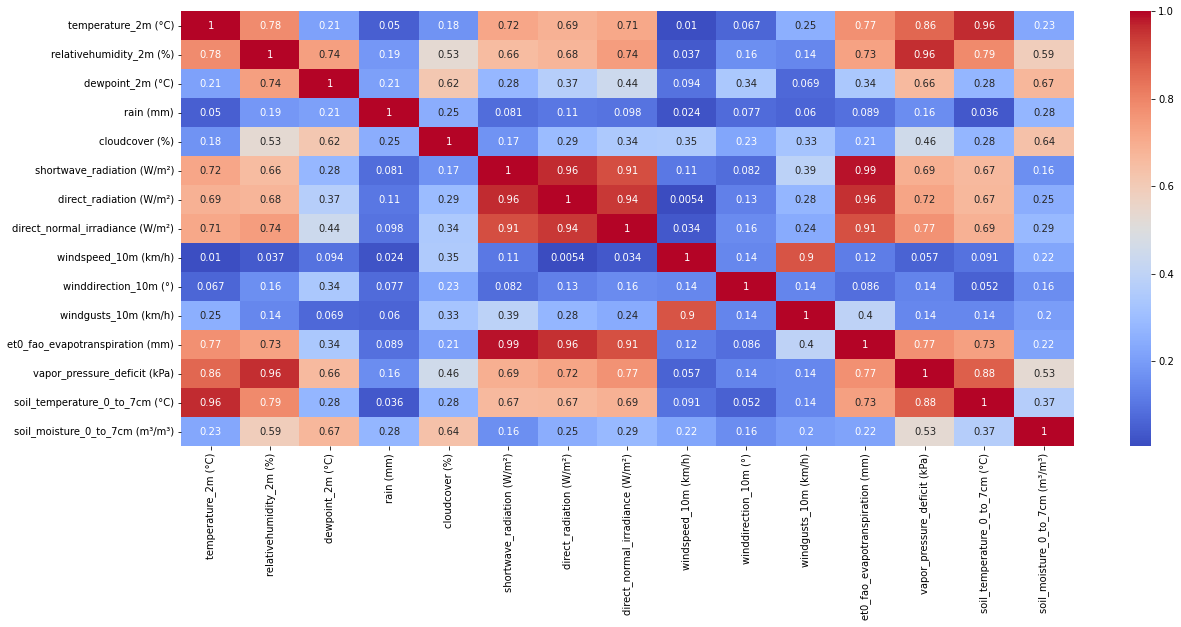

In [ ]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [ ]:
temperature_2m_max (°C)            5
temperature_2m_min (°C)            5
temperature_2m_mean (°C)           6
apparent_temperature_max (°C)      5
apparent_temperature_min (°C)      5
apparent_temperature_mean (°C)     6
shortwave_radiation_sum (MJ/m²)    6
rain_sum (mm)                      6
windspeed_10m_max (km/h)           5
windgusts_10m_max (km/h)           5
winddirection_10m_dominant (°)     6
dtype: int64

In [ ]:
df.drop('temperature_2m_max (°C)',inplace=True,axis=1)
df.drop('temperature_2m_min (°C)',inplace=True,axis=1)
df.drop('apparent_temperature_max (°C)',inplace=True,axis=1)
df.drop('apparent_temperature_min (°C)',inplace=True,axis=1)
df.drop('apparent_temperature_mean (°C)',inplace=True,axis=1)
df.drop('windgusts_10m_max (km/h)',inplace=True,axis=1)



In [ ]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),cloudcover (%),shortwave_radiation (W/m²),direct_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³),month,week_number
0,2020-02-18 00:00:00,17.9,53.0,8.2,0.0,0.0,0.0,0.0,0.0,12.2,88.0,23.0,0.07,0.97,21.6,0.251,2,07
1,2020-02-18 01:00:00,17.1,59.0,9.1,0.0,0.0,0.0,0.0,0.0,11.5,90.0,22.0,0.04,0.80,21.0,0.251,2,07
2,2020-02-18 02:00:00,16.4,64.0,9.6,0.0,0.0,0.0,0.0,0.0,10.8,94.0,20.2,0.03,0.67,20.4,0.251,2,07
3,2020-02-18 03:00:00,15.9,68.0,10.0,0.0,0.0,0.0,0.0,0.0,10.6,100.0,18.7,0.03,0.58,19.8,0.251,2,07
4,2020-02-18 04:00:00,15.4,71.0,10.1,0.0,0.0,0.0,0.0,0.0,9.6,103.0,17.6,0.02,0.51,19.3,0.251,2,07


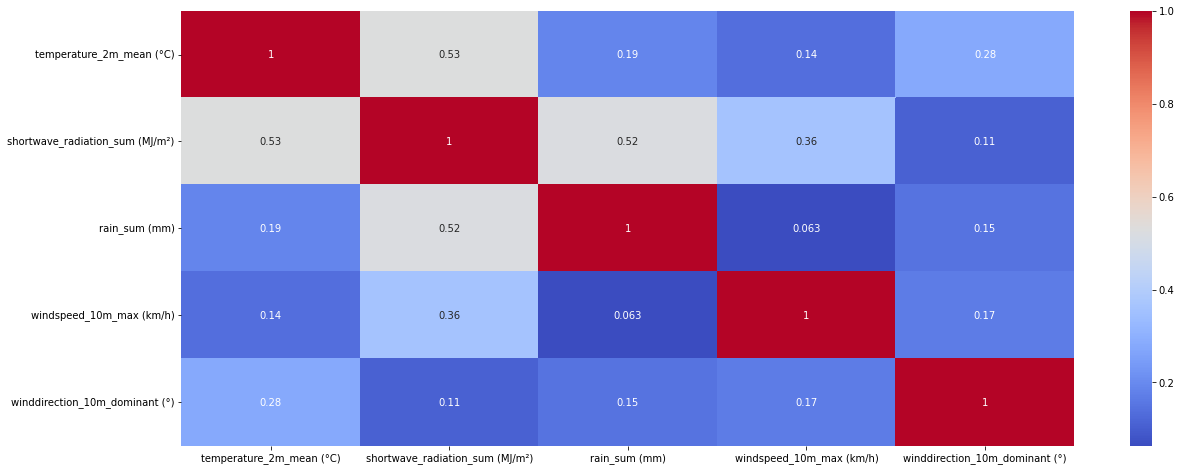

In [ ]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['rain_sum (mm)']]])

,variables,VIF
0,temperature_2m_mean (°C),176.172048
1,shortwave_radiation_sum (MJ/m²),25.099982
2,windspeed_10m_max (km/h),11.382531
3,winddirection_10m_dominant (°),5.494361
4,Day,4.266990
5,Month,6.654350
6,Year,175.679861


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
X=df.drop('rain_sum (mm)',axis=1)
y=np.sqrt(df['rain_sum (mm)'])

In [ ]:
# Spliting data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

,temperature_2m_mean (°C),shortwave_radiation_sum (MJ/m²),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
9,24.2,20.38,17.7,98.0,27,2,2020
898,21.9,10.56,12.3,167.0,4,8,2022
397,25.3,26.52,15.3,121.0,21,3,2021
744,22.7,25.29,21.7,6.0,3,3,2022
535,22.6,17.42,23.9,274.0,6,8,2021
...,...,...,...,...,...,...,...
1033,19.8,19.40,16.4,21.0,17,12,2022
763,24.2,12.88,7.6,222.0,22,3,2022
835,24.2,21.06,16.8,169.0,2,6,2022
559,21.6,15.46,23.1,266.0,30,8,2021


In [ ]:
# Transforming data 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
# Taking instance
l_reg=LinearRegression()


In [ ]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Cheecking coefficents
l_reg.coef_

array([ 1.38335977e+00, -5.23989301e+00, -1.22434898e+00,  5.10726699e-01,
       -2.51849687e-01,  7.48675855e-02,  7.47162045e-04])

In [ ]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
temperature_2m_mean (°C),1.383360
shortwave_radiation_sum (MJ/m²),-5.239893
windspeed_10m_max (km/h),-1.224349
winddirection_10m_dominant (°),0.510727
Day,-0.251850
Month,0.074868
Year,0.000747


In [ ]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

In [ ]:

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [ ]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 0.7905997178788302.
 The Mean Squred Error(MSE) is 1.0882105741751387.
The Root Mean Squared Error(RMSE) is 1.0431733193363117.
The R2 Score is 0.4350407395415835.


st